<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **Regressão Linear**
---

## Regressão Linear 

Um modelo linear aproxima o valor de variável objetivo $Y$ a partir de uma combinação linear das variáveis preditoras $X$. 

$  \widehat Y = a_0 + a_{1} X_{1} + a_{2} X_{2} + ... + a_{n} X_{n} $ 
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat Y$ para $X=0$ (*intercept*). 






## Obtendo os Coeficiente $a_n$, Método dos Mínimos Quadrados

Os coeficientes $a_n$ podem ser obtidos minimizando-se a soma da distância entre os valores reais $Y$ e os valores estimados $\widehat Y$. 

Para uma única variável $X$, podemos escrever:

$$min \sum d(Y, \widehat Y) = $$

$$ min \sum (y_i - \widehat y_i )^2 = $$ 

$$ min \sum (y_i - a_0 - a_i x_i )^2 $$ 

Esta é uma função convexa e os pontos de mínimo com relação aos valores coeficientes podem ser obtidos derivando-se a função. O resultado será: 

$$a_1 =  \frac{COV(x,y)}{VAR(x)} $$

$$ a_0 = \bar y - a_1 \bar x $$

Para mais detalhes veja: 
1. https://en.wikipedia.org/wiki/Regression_analysis
2. https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados








## Notas Práticas

1. Este é um modelo de Ciência de Dados? Note que regressão linear extrai de um conjunto de dados um modelo, um padrão para os dados, não óbvio e a partir do qual podemos fazer inferências úteis... reveja então nossa definição de Ciência de Dados. 
1. Note que quaisquer conjuntos de pontos apresentam podem ter os coeficientes da regressão calculados, mesmo não tendo uma aproximação linear.
1. O procedimento acima, para uma dimensão, se aplica a qualquer número de dimensões. 
1. Para a regressão linear o método dos mínimos quadrados permite a solução analítica. Em outros tipo de regressão, polinimial por exemplo, pode não haver uma solução analítica. O procedimento, entretanto, de se buscar um mínimo dos quadrados (uma função convexa) pode ainda ser aplicado (como, você tem alguma sugestão?)

## Uma regressão linear simples

Vamos começar com uma regressão simples de valores aleatórios apenas para você se familiarizar com a construção do modelo. 

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Gerando uma amostra de 50 valores "aleatórios" a partir de uma função linear.    

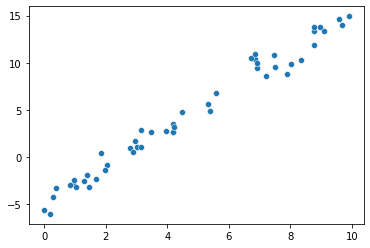

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x, y)

Podemos ainda traçar uma linha de aproximação linear com a função `sns.lmplot()`.

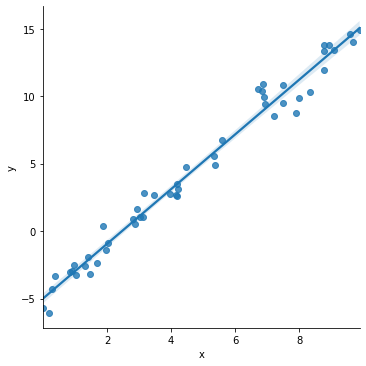

In [ ]:
df = pd.DataFrame({'x':x,'y':y}) 
sns.lmplot('x','y',data=df)


## Construindo o modelo linear, `sm.ols(formula = , data= )`

Um conjunto de dados é informado e o parâmetro `formula` indica as variáveis objetivo e preditoras.

````
                                                              formula = 'y ~ x' 
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + b_1 x $$



In [ ]:
model = sm.ols(formula='y ~ x', data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.71e-42
Time:                        14:14:02   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

E desse modo a aproximação linear é dada por:

$$ y = -4.9986 + 2.0272 x $$

Empregamos então o modelo para estimar os valores de $y$, isto é $\bar y$, a partir do modelo linear. Podemos então comparar os valores de $y$ e $\bar y$ (`predicted`). 


In [ ]:
df['predicted'] = result.predict(df.x)

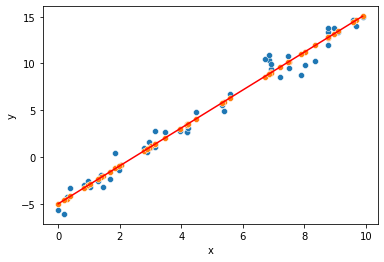

In [ ]:
sns.scatterplot('x','y',data=df)
sns.scatterplot('x','predicted',data=df)
sns.lineplot('x','predicted',data=df,color='red')
plt.show()

### Exercício

Faça o mesmo procedimento acima alterando a função inicial

```
y = 2 * x - 5 + rng.randn(50)
```
Por uma função não linear. Qual a sua conclusão?



## CASO: Estimando a economia de combustível de veículos na cidade

**Fuel economy data from 1999 and 2008 for 38 popular models of car**. Para descrição dos dados acesse https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/mpg.html. 


Para dados mais recentes e detalhados veja:

1. https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/mpg.csv")
df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Inicialmente vamos verificar como se relacionam as demais **variáveis numéricas** (mais adiante vamos tirar essa limitação!) com a variável objetivo `cyl`(o consumo dos veículos na cidade).  

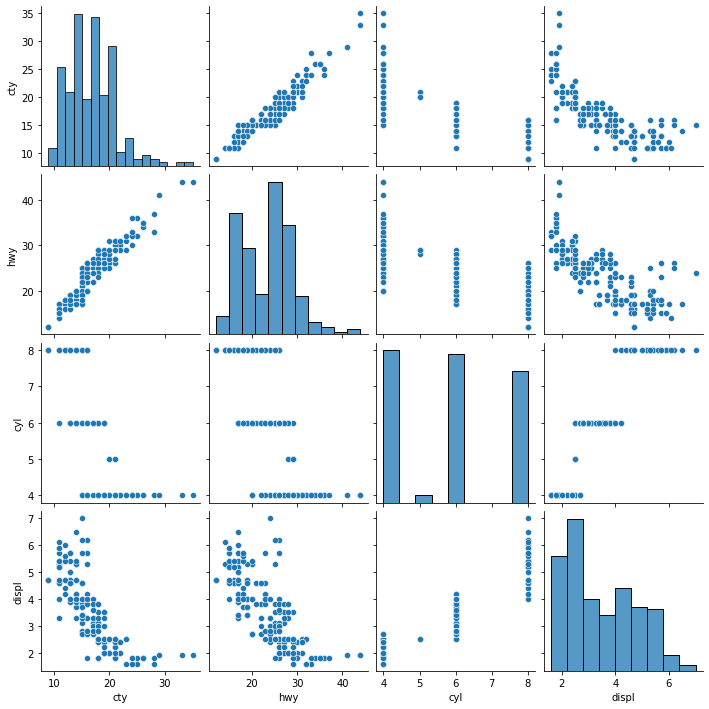

In [ ]:
sns.pairplot(df[['cty','hwy','cyl','displ']])

`hwy` parece ser a variável que mais se aproxima de uma relação linear com `cyl`. Vamos, portanto, tentar determinar o consumo de combustível na cidade `cty` a partir, inicialmente, somente do atributo de consumo dos veículos na estrada, o atributo `hwy`. Isto é, vamos criar um modelo:

$$ \widehat{cty} =  a_0 + a_1 hwy $$



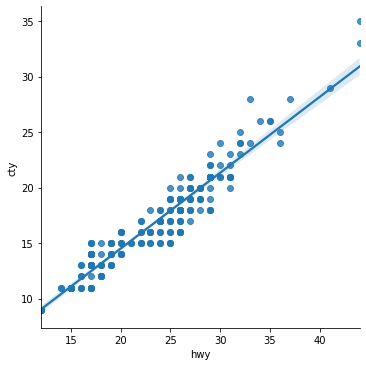

In [ ]:
sns.lmplot('hwy', 'cty', data=df)

In [ ]:
model = sm.ols(formula="cty ~ hwy ", data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cty   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2459.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.87e-125
Time:                        14:14:08   Log-Likelihood:                -383.69
No. Observations:                 234   AIC:                             771.4
Df Residuals:                     232   BIC:                             778.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8442      0.333      2.534      0.0

Obtemos assim o modelo:

$$ \widehat{cty} = 0.8442 + 0.6832 \times hwy  $$
 



## Predição de novos valores, `predict(x)`

Podemos agora empregar nosso modelo para estimar o consumo de um novo veículo na cidade, que não conhecemos, mas conhecemos o seu consumo na estrada. Digamos para `hwy = 12` ou ainda `hwy=52`.  

In [ ]:
x = pd.DataFrame({'hwy': [52,12]})
result.predict(x)

0    36.371595
1     9.042831
dtype: float64

**Mas será esse um bom modelo?**

## Verificação Visual

In [ ]:
df['predicted'] = result.predict()

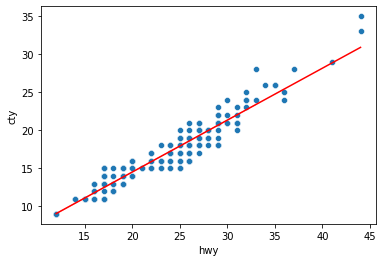

In [ ]:
sns.scatterplot('hwy', 'cty', data=df)
sns.lineplot('hwy', 'predicted', data=df, color='red')
plt.show()


A inspeção visual entretanto é bastante limitada e, no máximo, pode permitir a avaliação de modelos de até 3 dimensões.

# Coeficiente de Determinação, $R^2$

O Coeficiente de Determinação, Coeficiente de Correlação, ou ainda $R-$Square é uma medida de $[0,1]$ que indica o quanto um modelo linear explica um conjunto de dados. Quanto mais próximo de 1, mais os dados se aproximam de um modelo linear.

$$ R^2 = 1 - \frac{SS_e}{SS_{total}} $$

onde 

$$SS_e = \sum (y_i - \widehat y_i )^2 $$ é o (erro) *resíduo* e,

$$SS_{total} = \sum (y_i - \bar y )^2 $$ 

o *erro total*.


Para mais detalhes veja:
1. https://en.wikipedia.org/wiki/Coefficient_of_determination


## $p-value$  dos Coeficientes

Outra medida importante sobre o *p-value* dos coeficientes. Assumindo a hipótese nula do coeficiente ser igual a zero, buscamos coeficientes cujo *p-value* rejeitem a hipótese nula.

$$ H_0: a_i = 0 $$
$$ H_a: a_i \neq 0 $$



## Intervalo de Confiança dos Coeficientes

O Intervalo de Confiança dos Coeficientes possui duas definições equivalentes:

1. O intervalo é o conjunto de valores para os quais um teste de hipótese para o nível de 5% não pode ser rejeitado.
1. O intervalo tem uma probabilidade de 95% de conter o verdadeiro valor de $a_i$ ou ainda, em 95% de todas as amostras que poderiam ser coletadas, o intervalo de confiança cobrirá o valor real de $a_i$.

Para mais detalhes dos intervalos de confiança e p-value, veja:

1. https://www.econometrics-with-r.org/4-3-measures-of-fit.html#application-to-the-test-score-data

## Analisando os dados do modelo

$$ R^2 = 0.914 $$
$$ p-values < 0.05 $$

Podemos ver que esse é um modelo bastante confiável. 

(o intervalo de confiança é uma verificação adicional. Ele dá um range de valores de cada coeficiente, podemos empregá-lo para identificar possíveis desvios nos coeficientes). 

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cty   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2459.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          1.87e-125
Time:                        14:14:08   Log-Likelihood:                -383.69
No. Observations:                 234   AIC:                             771.4
Df Residuals:                     232   BIC:                             778.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8442      0.333      2.534      0.0

## Adicionando variáveis ao modelo

Vamos agora adicionar ao nosso modelo a variável preditora de cilindradas do motor (`displ`). 

In [ ]:
model = sm.ols(formula="cty ~ hwy + displ", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cty   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1412.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          2.93e-130
Time:                        14:14:08   Log-Likelihood:                -368.30
No. Observations:                 234   AIC:                             742.6
Df Residuals:                     231   BIC:                             753.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7368      0.751      6.306      0.0

Agora o modelo obtido é:

$$cty = 4.7368 + 0.5954 \times hwy - 0.5283 \times displ$$

(por simplicidade adotamos agora $cty$ no lugar de $\widehat{cty}$. Qual a diferença?)

## Analisando os dados do modelo

$$ R^2 = 0.924 $$
$$ p-values < 0.05 $$

Podemos ver que esse é um modelo bastante confiável apresentando um erro menor ainda que o modelo anterior (por que?). 


### Exercício

Refaça o modelo incluindo o atributo `cyl`. O modelo obtido é melhor?

## Conclusão

1. Modelos de Regressão Lineares são bem definidos (determinísticos), os coeficientes só dependendo das médias dos valores e das variâncias e covariância dos valores.
1. Funcionam para quaisquer dimensões.
1. Podem aplicados a quaisquer conjunto de dados, por isso é necessário avaliar o quanto o modelo de fato se ajusta ao dados (r-square, p-value e intervalo de confiança)
1. O modelo de regressão linear pode ser associado a transformações, como por exemplo a aplicação de $log()$:

$$ Log(y) = a_0 + a_1 x_1 + a_2 x_2 + ...$$

Ou ainda, o método de mínimos quadrados empregado para obter coeficientes de regressões polinomiais e de composição com outras funções:


$$ y = a_0 + a_1 x_1^2 + a_2 x_2^2 + ...$$

ou 

$$ y = a_0 + a_{11} x_1 + a_{12} x_1^2 + a_{21} x_2 + a_{22} x_2^2 +...$$

### Valores Categóricos

Para o emprego de valores categóricos na regressão linear é necessária a codificação dos valores para numérico. Veja no material complementar da T6 o uso do **hot encode** e a aplicação de um modelo de regressão linear para várias variáveis categóricas.

### Exercício

Adicione ao último modelo a variável `drv` aplicando o **hot encode** e compare os resultados. 